In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


Загрузка данных и первичный осмотр

In [5]:
import pandas as pd
file_path = r'C:\Users\kuzne\Downloads\archive\Customer-Churn-Records.csv'
df = pd.read_csv(file_path)
print("Размер: ", df.shape)
print("\nНазвания столбцов: ")
print(df.columns.tolist())
print("\nТипы данных: ")
print(df.dtypes)
print("\nПропущенные значения: ")
print(df.isnull().sum())
df.head()

Размер:  (10000, 18)

Названия столбцов: 
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']

Типы данных: 
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Пропущенные значения: 
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Смотрим распределение оттока клиентов

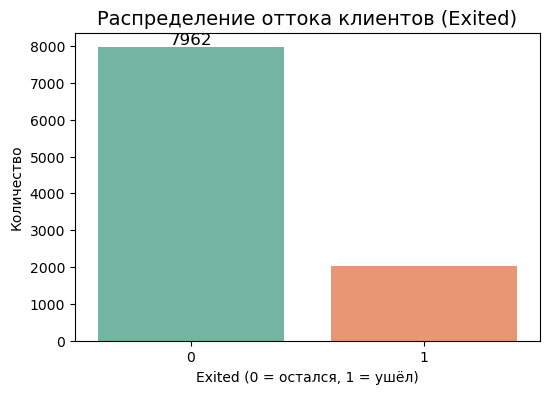


Процент клиентов, которые ушли: 20.38%

Процент клиентов, которые ушли: 20.38%


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Exited', hue='Exited', palette='Set2', legend=False)
plt.title('Распределение оттока клиентов (Exited)', fontsize=14)
plt.xlabel('Exited (0 = остался, 1 = ушёл)')
plt.ylabel('Количество')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
    plt.show()
    churn_rate = df['Exited'].mean() * 100
    print(f"\nПроцент клиентов, которые ушли: {churn_rate:.2f}%")

Отток составил около 20%,  банк теряет каждого пятого клиента

Анализ числовых признаков в зависимости от оттока
Смотрим, как возраст, баланс и зарплата влияют на отток.

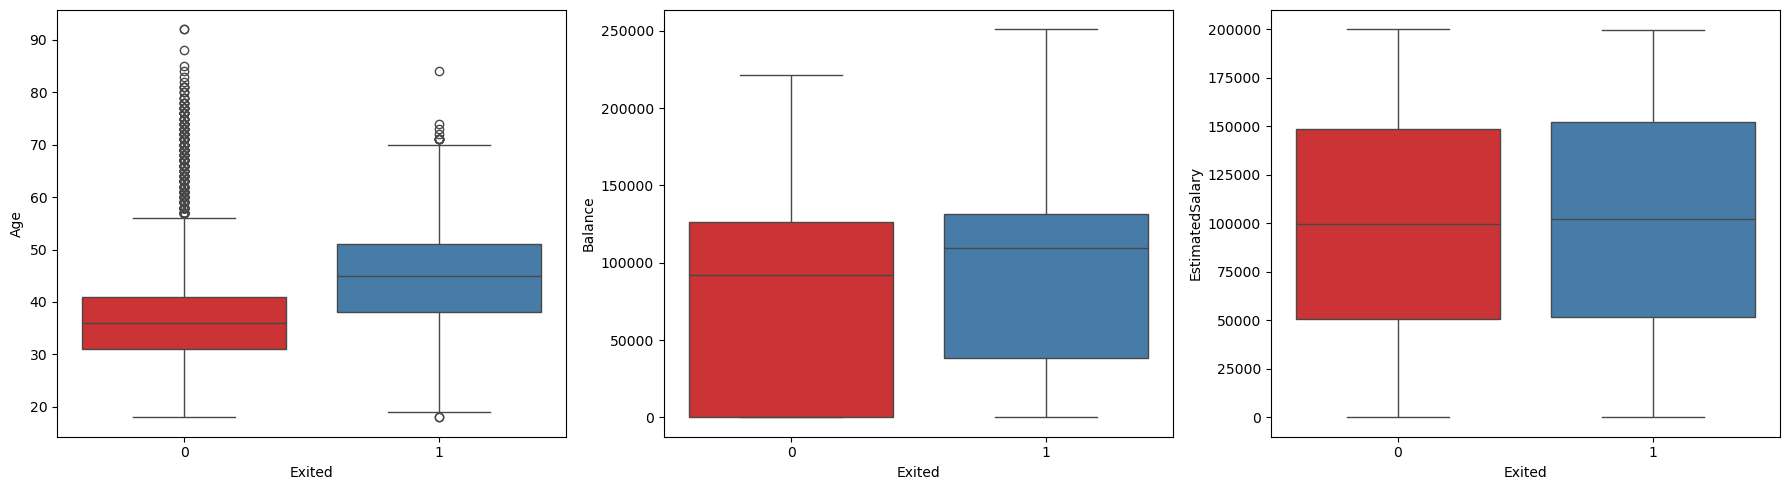

In [15]:
num_cols = ['Age', 'Balance', 'EstimatedSalary']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
df = df.dropna(subset=num_cols)  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Exited', y=col, ax=axes[i], hue='Exited', palette='Set1', legend=False)
plt.tight_layout()
plt.show()

График Age
Ушедшие клиенты обозначены красным цветом. Медиана возраста ушедших клиентов- 45-50 лет, оставшихся - 35-40 лет.

График Balance
Чаще всего ушедшие клиенты имеют низкий баланс, их медиана составляет около 50000. У оставшихся клиентов баланс выше, медиана около 100000.
Также есть много клиентов с нулевым балансом - именно они уходят чаще.

График EstimatedSalary
Распределение зарплаты практически одинаковое для обеих групп. Значит чёткой связи между зарплатой и оттоком нет.

Анализ категориальных признаков в зависимости от оттока
Смотрим, как страна, пол, наличие карты и активность влияют на отток.

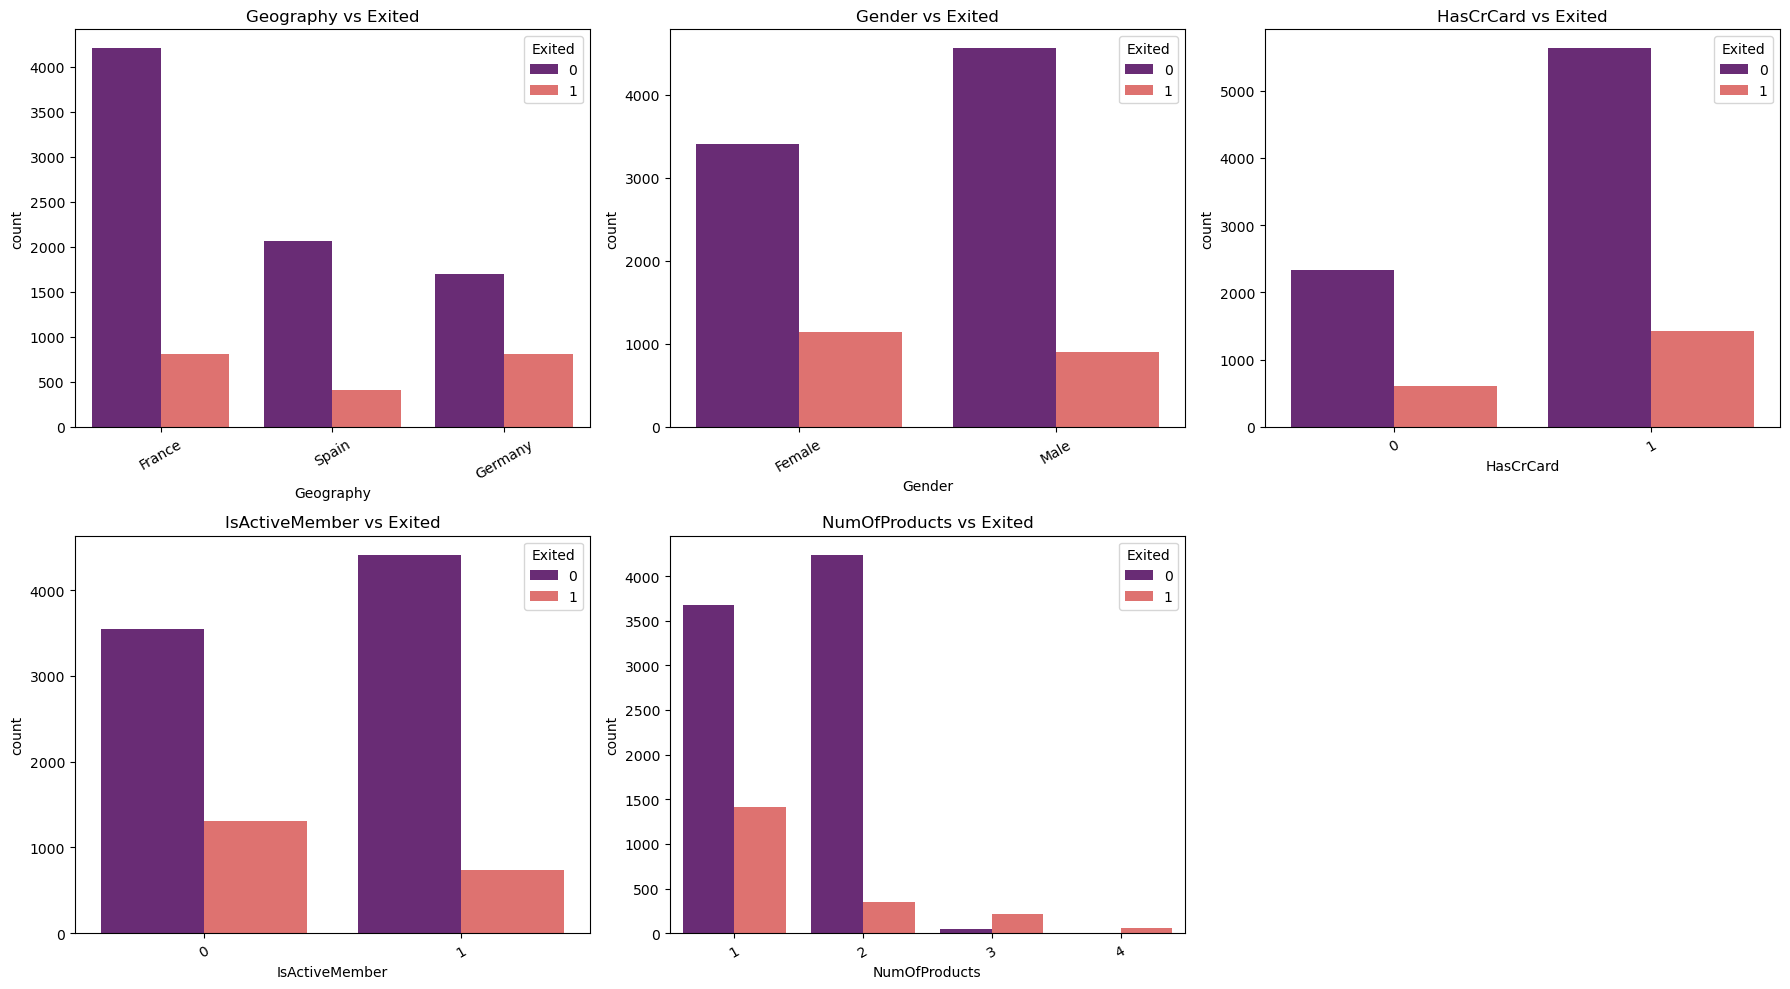

In [16]:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Exited', ax=axes[i], palette='magma')
    axes[i].set_title(f'{col} vs Exited')
    axes[i].tick_params(axis='x', rotation=30)
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

График Geography
Наименьший отток наблюдается во Франции, наибольший - в Германии. Возможно присутсвуют проблемы с локальным сервисом или конкуренцией в стране.
График Gender
Женщины уходят чаще мужчин, возможно стоит подобрать определённый подход в обслуживании для женщин.
График HasCrCard
Наличие карт не влияет на отток клиентов.
График IsActiveMember
Активные клиенты уходят реже, чем неактивные клиенты. Это связана с лояльностью активных клиентов по отношению к продукту.
График NumOfProducts
Клиенты с 1 продуктом - это самая уязвимая группа, именно среди них наблюдается наибольший отток. Таким клиентам стоит предлагать другие продукты банка.

Корреляция между числовыми признаками
Смотрим, какие признаки связаны друг с другом и с оттоком.

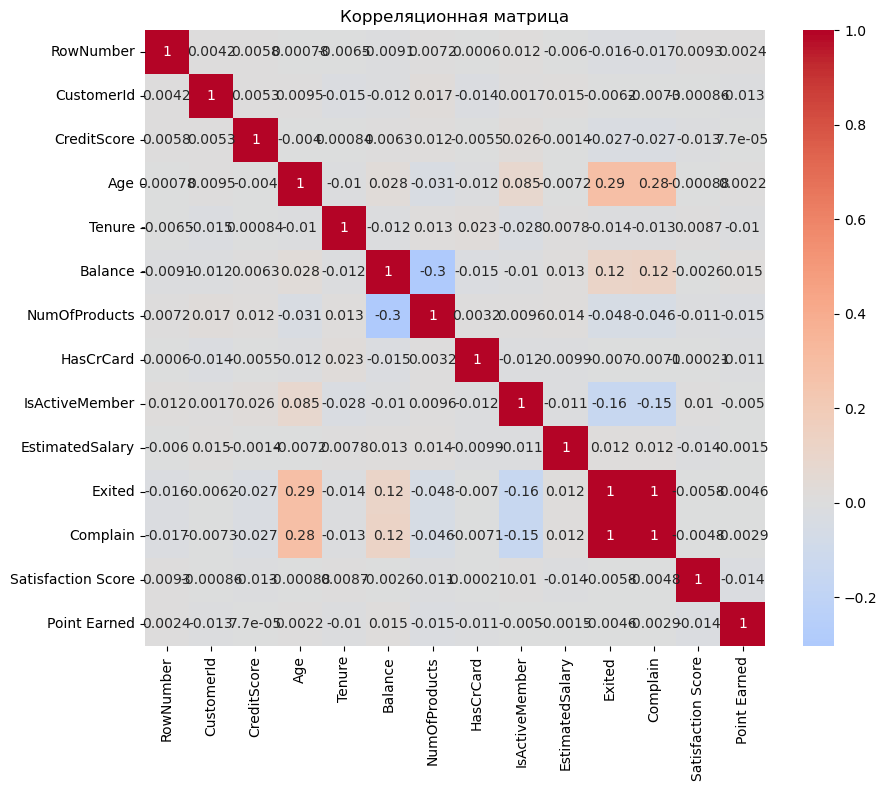

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

Самая сильная корреляция с Exited:
Age (+0.29) - чем клиенты старше, тем чаще уходят;
Balance (-0.01) - слабая связь;
NumOfProducts (-0.3) - чем больше продуктов, тем реже уходят;
IsActiveMember (-0.16) - активные клиенты уходят реже.
Лучшие признаки для модели: Age, NumOfProducts и IsActiveMember - именно на них стоит сконцентрироваться.

Построение логистической регрессии 

Размер X: (10000, 3)
Размер y: (10000,)
Обучающая выборка: (8000, 3)
Тестовая выборка: (2000, 3)
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1592
           1       0.32      0.05      0.08       408

    accuracy                           0.78      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.70      0.78      0.72      2000



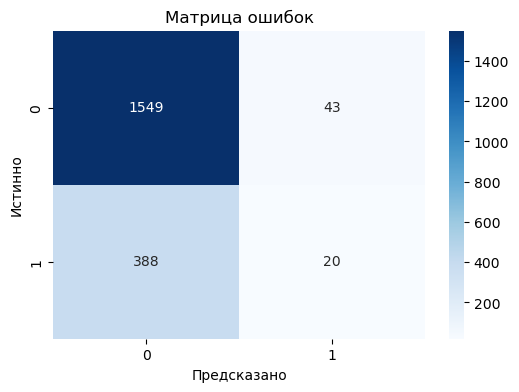

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['Age', 'Balance', 'NumOfProducts']]
y = df['Exited']
print('Размер X:', X.shape)
print('Размер y:', y.shape)
     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()

Модель верно классифицирует 78% клиентов.
Она хорошо определяет оставшихся клиентов (класс 0), но плохо - ушедших клиентов (класс 1).

Рекомендации:
1) Целевые предложения для клиентов >45 лет;
2) Программы лояльности для неактивных клиентов;
3) Кросс-продажи для клиентов с 1 продуктом;
4) Улучшение сервиса в Германии.